CRYPTOCURRENCY PRICE PREDICTION:




The provided code fetches historical data of Bitcoin from Yahoo Finance using the yfinance library and saves it into a DataFrame named btc. The head() and tail() functions display the first few rows and the last few rows of the DataFrame, respectively. This allows you to quickly inspect the structure and content of the data.

In [ ]:

import pandas as pd
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch historical data from Yahoo Finance and save to a CSV file
btc_ticker = yf.Ticker("BTC-USD")
btc = btc_ticker.history(period="max")
btc.head()
btc.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-04 00:00:00+00:00,62891.031250,64494.957031,62599.351562,63891.472656,20620477992,0.0,0.0
2024-05-05 00:00:00+00:00,63892.453125,64610.890625,62955.304688,64031.132812,18296164805,0.0,0.0
2024-05-06 00:00:00+00:00,64038.312500,65494.902344,62746.238281,63161.949219,28697928697,0.0,0.0
2024-05-07 00:00:00+00:00,63162.761719,64390.457031,62285.980469,62334.816406,25930730982,0.0,0.0
2024-05-08 00:00:00+00:00,62322.082031,62932.273438,62184.972656,62187.730469,25220485120,0.0,0.0


## Feature Engineering

The columns of Dividends and Stock Splits are not very influential over the prediction and hence removed as part of the Feature Engineering process

In [ ]:
# Remove unnecessary columns ----- Feature Extraction
del btc['Dividends']
del btc['Stock Splits']


**The code constructs a URL to fetch real-time data of Bitcoin (BTC) from the CoinGecko API using the requests.get() function.
It sends a GET request to the constructed URL and stores the response in real_time_response.
It parses the JSON response into a Python dictionary using the .json() method and extracts the current price of Bitcoin in USD, storing it in the variable current_price.**

In [ ]:

# Fetch real-time BTC price using CoinGecko API
currency_name = "BTC"
crypto_id = 'bitcoin'
vs_currency = 'usd'
real_time_url = f'https://api.coingecko.com/api/v3/simple/price?ids={crypto_id}&vs_currencies={vs_currency}'
real_time_response = requests.get(real_time_url)
real_time_data = real_time_response.json()
current_price = real_time_data[crypto_id][vs_currency]


This code defines a class Analysis to analyze sentiment and subjectivity of news headlines related to a search term. It fetches Google search results, calculates sentiment and subjectivity scores using TextBlob, and returns the averages. Finally, an instance is created with the search term 'bitcoin', and its run() method is called to perform the analysis.

In [ ]:
from textblob import TextBlob
from bs4 import BeautifulSoup
import requests

class Analysis:
    def __init__(self, term):
        self.term = term
        self.sentiment = 0
        self.subjectivity = 0
        self.url = 'https://www.google.com/search?q={0}&source=lnms&tbm=nws'.format(self.term)

    def run(self):
        response = requests.get(self.url)
        soup = BeautifulSoup(response.text, 'html.parser')
        headline_results = soup.find_all('div', class_='kCrYT')
        for text in headline_results:
            blob = TextBlob(text.get_text())
            self.sentiment += blob.sentiment.polarity / len(headline_results)
            self.subjectivity += blob.sentiment.subjectivity / len(headline_results)
        return (self.sentiment, self.subjectivity)

#a= Analysis('bitcoin')
#a.run()
#print(a.term, a.subjectivity, a.sentiment)



This code defines a function get_sentiment(date) to calculate sentiment scores for Bitcoin prices based on news headlines for a given date. It then adds a new column 'Sentiment' to the historical Bitcoin data. Finally, it iterates through the historical data's last 7 dates, calculates sentiment scores for each date, and updates the 'Sentiment' column accordingly.







In [ ]:
# Define a function to calculate the sentiment score for a given date
def get_sentiment(date):
    term = currency_name+'price ' + date.strftime('%Y-%m-%d')
    analysis = Analysis(term)
    sentiment, subjectivity = analysis.run()
    return sentiment

# Add a new column to the historical data for the sentiment score
btc['Sentiment'] = 0

# Calculate the sentiment score for each day in the historical data
for date in btc.index[-8:-1:-1]:
    sentiment = get_sentiment(date)
    btc.at[date, 'Sentiment'] = sentiment


This code performs Exploratory Data Analysis (EDA) on Bitcoin historical data (btc_data).

1. It plots the Bitcoin closing price over time, providing insights into the trend and variability in prices.
2. It plots the Bitcoin volume over time, indicating the trading activity and liquidity of Bitcoin.
3. It visualizes the distribution of Bitcoin closing prices, offering insights into the variability and skewness of price data.
4. It plots the relationship between Bitcoin closing prices and sentiment scores, providing insights into potential correlations between market sentiment and price movements.
5. It generates a heatmap of the correlation matrix between different features in the Bitcoin dataset, highlighting potential relationships between variables such as price, volume, and sentiment scores.

Overall, this EDA helps in understanding the patterns, distributions, and correlations present in the Bitcoin historical data, aiding in making informed decisions for further analysis or modeling.




In [ ]:

# Perform Exploratory Data Analysis (EDA) on the BTC historical data
def perform_eda(btc_data):
    # Plot 1: Bitcoin Closing Price Over Time
    plt.figure(figsize=(12, 6))
    btc_data['Close'].plot()
    plt.title('Bitcoin Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.show()

    # Plot 2: Bitcoin Volume Over Time
    plt.figure(figsize=(12, 6))
    btc_data['Volume'].plot()
    plt.title('Bitcoin Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.show()

    # Plot 3: Distribution of Bitcoin Closing Prices
    plt.figure(figsize=(10, 6))
    sns.histplot(btc_data['Close'], bins=30, kde=True)
    plt.title('Distribution of Bitcoin Closing Prices')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Plot 4: Bitcoin Closing Price vs. Sentiment Score
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Close', y='Sentiment', data=btc_data)
    plt.title('Bitcoin Closing Price vs. Sentiment Score')
    plt.xlabel('Closing Price (USD)')
    plt.ylabel('Sentiment Score')
    plt.grid(True)
    plt.show()

    # Plot 5: Heatmap of Correlation Matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(btc_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Heatmap of Correlation Matrix')
    plt.show()


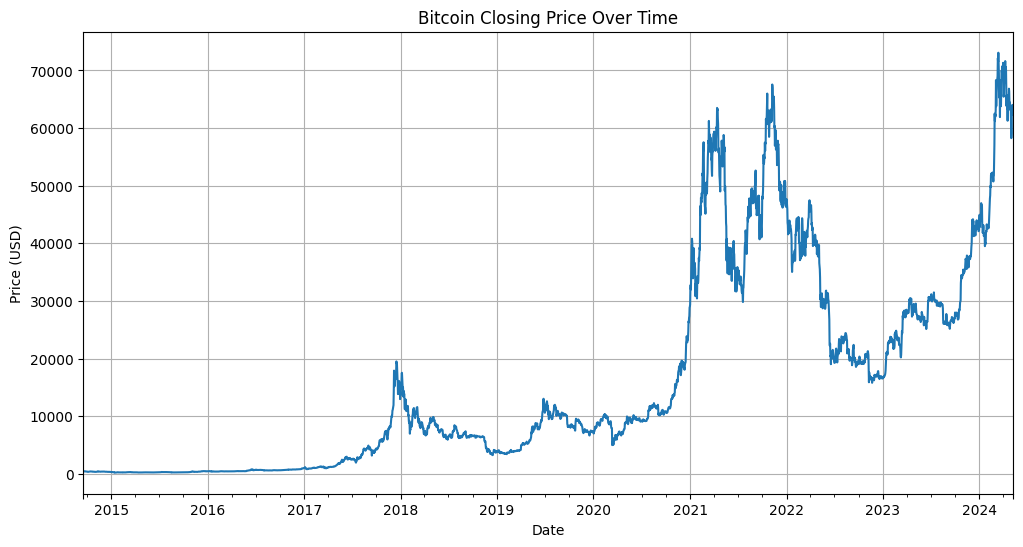

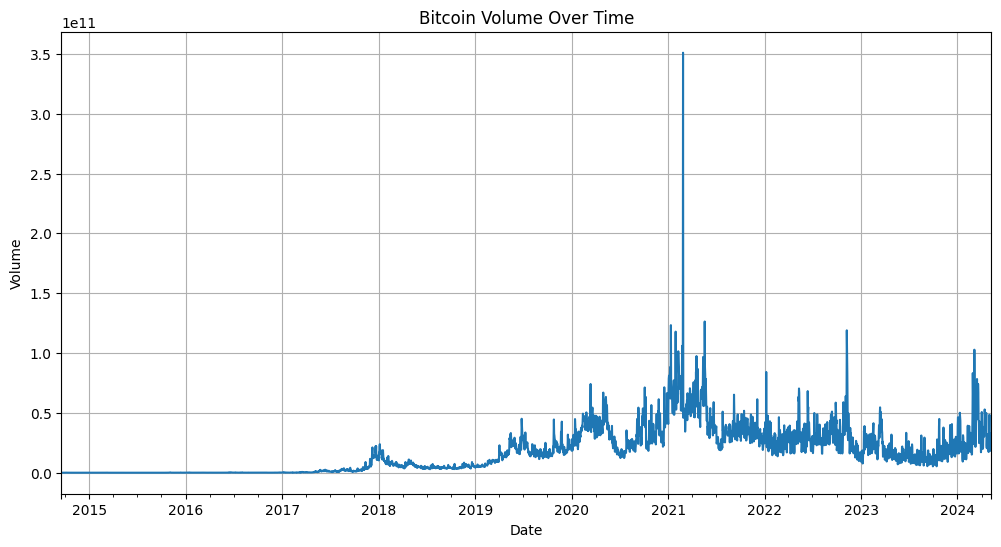

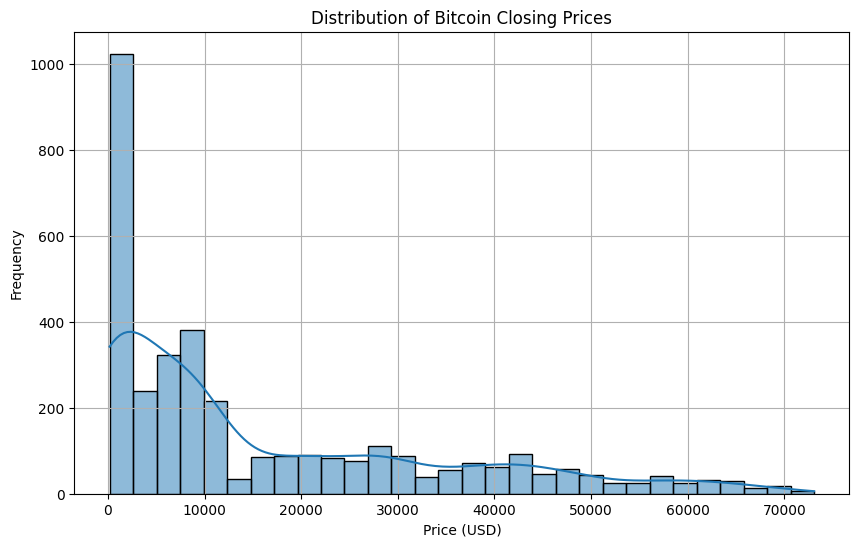

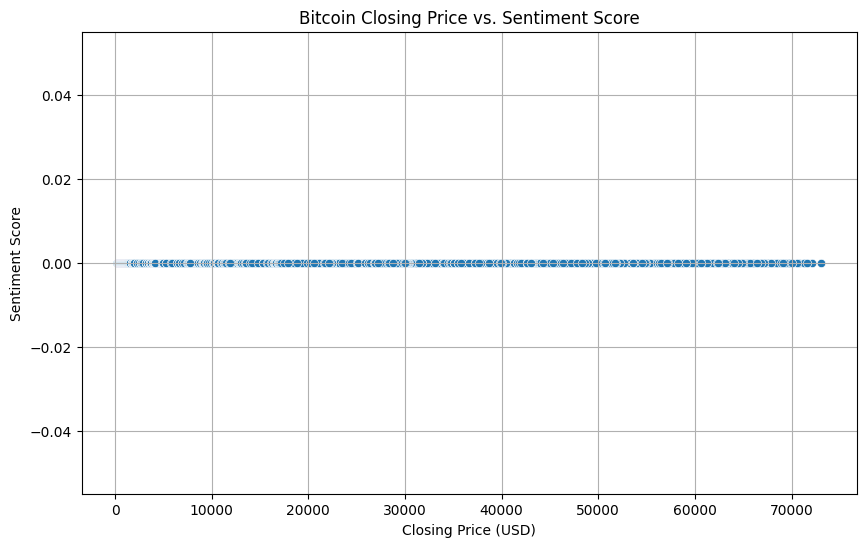

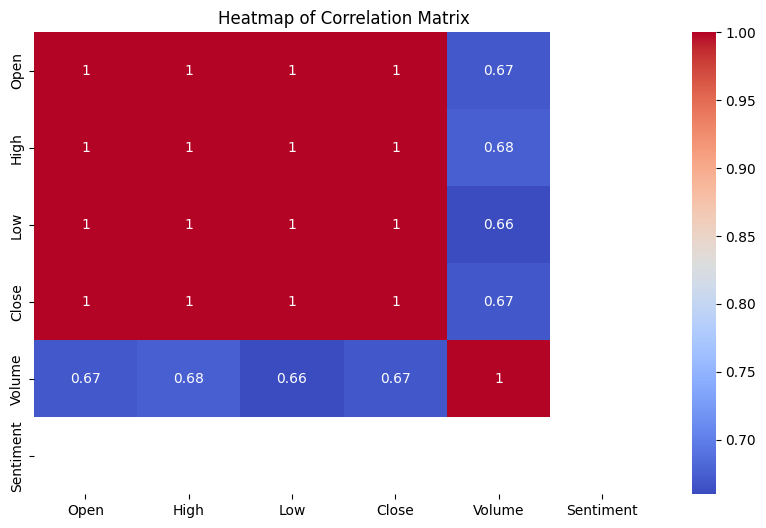

In [ ]:

# Perform EDA
perform_eda(btc)


**Choosing the features and Targets**

In [ ]:

# Prepare the historical data for model training
X = btc.drop(['Close'], axis=1)  # Features (excluding Close price)
y = btc['Close']  # Target variable (Close price)


In [ ]:
import numpy as np

**Train Test Split**

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Regressor:

**What it is:** Random Forest Regressor is a supervised learning algorithm that belongs to the ensemble learning category. It operates by constructing multiple decision trees during training and outputs the average prediction of the individual trees.

**How it works:** Each decision tree in the random forest is built independently and operates by splitting the dataset into subsets based on features. Each tree makes its own prediction, and the final prediction is the average of all the trees' predictions (regression task) or the majority vote (classification task).

**Advantages:**
It can handle large datasets with high dimensionality.
It is robust to overfitting, as it averages out the predictions of multiple trees.
It provides a measure of feature importance, allowing insights into the most influential variables.

**Disadvantages:**
It may not perform well on datasets with noisy features or outliers.
Random forests can be computationally expensive, especially for large datasets.
Applications: Random Forest Regressors are used in various domains such as finance for stock price prediction, healthcare for disease diagnosis, and ecology for species distribution modeling.




In [ ]:

# Train a RandomForestRegressor model using historical data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the trained model
prediction = model.predict(X_test)


In [ ]:
errors = abs((prediction - y_test)/y_test)
print('Mean Relative Error:', np.mean(errors))

Mean Relative Error: 0.013786014364049921


In [ ]:

rmse = np.sqrt(((prediction - y_test) ** 2).mean())
print("Root Mean Squared Error : ", rmse)


Root Mean Squared Error :  434.39781365605


**The Root Mean Square Error indicates a small value of 434 considering the large magnitude of numbers involved**

**The Mean Relative Error of 0.013 indicates an excellent performance of the model**

** Real Time Prediction ** - closing price for today

In [ ]:
current_data = pd.DataFrame(columns=X.columns)  # Create an empty DataFrame

# Create a Series with the current price
current_price_series = pd.Series(current_price, index=current_data.columns)

# Append the Series as a new row using concat
current_data = pd.concat([current_data, current_price_series.to_frame().T], ignore_index=True)

# Make predictions using the trained model
prediction = model.predict(current_data)

# Print the predicted Bitcoin price
#print(f'Predicted price: {prediction[0]}')
print("Prediction: ",str(prediction[0]))


Prediction:  62177.9550390625


Gradient Boosting Regressor:

**What it is:** Gradient Boosting Regressor is another ensemble learning technique used for regression tasks. Unlike Random Forest, which builds multiple trees independently, Gradient Boosting builds trees sequentially, with each tree learning from the errors of its predecessors.

**How it works:** Gradient Boosting combines weak learners (typically decision trees) to create a strong predictive model. In each iteration, the model fits a new tree to the residuals (errors) of the previous predictions, gradually reducing the error over multiple iterations.

**Advantages:**
It can capture complex relationships in the data due to its sequential nature.
It often provides better predictive performance compared to other algorithms.
It handles missing data well and is robust to outliers.

**Disadvantages:**
Gradient Boosting tends to be more sensitive to overfitting compared to Random Forests, especially if not properly tuned.
It can be computationally expensive and time-consuming, especially for large datasets and complex models.

**Applications:** Gradient Boosting Regressors are commonly used in various domains such as web search ranking, recommendation systems, and in finance for predicting stock prices or credit risk.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a GradientBoostingRegressor model using historical data
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions using the trained Gradient Boosting model
gb_prediction = gb_model.predict(X_test)

# Evaluate the performance of the Gradient Boosting model
gb_rmse = (mean_squared_error(y_test, gb_prediction))**0.5
print("Gradient Boosting Root Mean Squared Error:", gb_rmse)
errors = abs((gb_prediction - y_test)/y_test)
print('Mean Relative Error:', np.mean(errors))

Gradient Boosting Root Mean Squared Error: 449.3707727794019
Mean Relative Error: 0.031908354900718076


In [ ]:
gb_prediction = gb_model.predict(current_data)
print("Prediction using Gradient Boost Regressor: ", gb_prediction)


Prediction using Gradient Boost Regressor:  [62388.37387556]


**The Gradient Boost Regressor achieves a Root Mean Square error value of 442 which is similar to RandomForest.

The Mean Relative error of 0.032 indicates decent performance**


### ** For the given dataset and the nature of the problem, RandomForestRegressor seems to give better results in comparison to GradientBoostRegressor **